# Analysis for Continuous Improvement

Author Name: Naomi Tymann

9-digit PID: 730466987

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should offer tutoring and office hours sessions through Zoom, as well as in person, for students who cannot make it to in person office hours during their operating times.
2. The course should encourage more conversations between students after completing examples during lecure for students who want to network with others during class, in addition to the existing support of the TAs.
3. The course should have a page available in Coure.Care or on the class website for the semester that features students' current grades in the class, for students who cannot see the progress of their grades during the semester, or for those who are unsure of their grades according to the assignments submitted on Gradescope.
4. The course should offer a Listserv or other notification method to involve beginner students in more events from the Computer Science department, both for the students and for faculty looking to mentor or otherwise work with students who share similar academic interests.
5. The course lectures and notifications on the website should include more details about computer science jobs that students may be hired for after college, both for the benefit of students and for companies or industries that are looking to hire computer science students after their time as undergraduates.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: Offering a page on Course.Care for students to check their grades during the semester.

2. Suggestion for how to collect data to support this idea in the future: Asking students for input on whether or not they would be comfortable with primarily seeing their grades on a class-hosted site, and rating the level of usefullness of that change on a scale of 1 to 5, with 1 being the lowest and 5 being the highest.

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: Using a group messaging system to notify students of coding oppurtinities on and around campus.

2. This idea is more valuable than the others brainstormed because: It would provide opportunities for computer science majors to find resources in such a competitive major, and it would help non computer science majors find opportunities that could apply to their interests and allow them to combine their knowledge from computer science and their primary majors. Plus, it would help computer science professionals from UNC reach a broader audience to discuss their areas of interest with.


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [2]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`, and by establishing the path that the data must go through in the parent directory to reach this file.

In [3]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

First, we need to import `read_csv_rows` from `data_utils` to import the class survey data into a Jupyter notebook.

After importing that function, the print statement will show the number of rows and columns, and it will show the names of each column. It will be important to keep track of this data going forward, as we are going to select specific rows and columns to analyze.

In [4]:
from data_utils import read_csv_rows

data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

print(f"Data File Read: {SURVEY_DATA_CSV_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
620 rows
35 columns
Columns names: dict_keys(['row', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'ap_principles', 'ap_a', 'other_comp', 'prior_time', 'languages', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'flipped_class', 'no_hybrid', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


Now, we must make the row-oriented data from `survey.csv` into column-oriented data.

We can do this by importing the `head` function from `data_utils`, as shown below.

This will be useful for displaying multiple rows of data at once, rather than showing all of the data in one column, which would happen with `survey.csv` by default.

In [5]:
from data_utils import columnar

data_cols: dict[str, list[str]] = columnar(data_rows)

print(f"{len(data_cols.keys())} columns")
print(f"{len(data_cols['row'])} rows")
print(f"Columns names: {data_cols.keys()}")

35 columns
620 rows
Columns names: dict_keys(['row', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'ap_principles', 'ap_a', 'other_comp', 'prior_time', 'languages', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'flipped_class', 'no_hybrid', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


Next, we must format the input data into clear rows and columns. This is done by importing the `tabulate` 3rd party command that will format the data into a table. The row values will be the information asked for, and the column values will be the responses.

In [6]:
from tabulate import tabulate

For this analysis, we will be looking at the first 10 rows of class data. The printed statement will not include all of the class data, but it will provide a good example of students' majors (and whether or not they are majoring or minoring in computer science), as well as their experience with related mathematical concepts.

In [7]:
from data_utils import head

data_cols_head: dict[str, list[str]] = head(data_cols, 10)

tabulate(data_cols_head, data_cols_head.keys(), "html")

row,year,unc_status,comp_major,primary_major,data_science,prereqs,prior_exp,ap_principles,ap_a,other_comp,prior_time,languages,hours_online_social,hours_online_work,lesson_time,sync_perf,all_sync,flipped_class,no_hybrid,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,pace,difficulty,understanding,interesting,valuable,would_recommend
0,22,Returning UNC Student,No,Mathematics,No,"MATH 233, MATH 347, MATH 381",7-12 months,No,No,UNC,1 month or so,"Python, R / Matlab / SAS",3 to 5 hours,0 to 2 hours,6,2,2,1,2,4,4,0,7,3,7,5,,,1,1,7,5,6,5
1,25,Returning UNC Student,No,Mathematics,Yes,"MATH 130, MATH 231, STOR 155",None to less than one month!,,,,,,0 to 2 hours,5 to 10 hours,4,3,3,1,2,6,4,5,5,5,5,5,7,6,6,6,3,4,6,4
2,25,Incoming First-year Student,Yes - BA,Computer Science,No,"MATH 130, MATH 152, MATH 210",None to less than one month!,,,,,,3 to 5 hours,5 to 10 hours,3,3,4,2,1,7,7,2,5,6,7,7,4,,6,4,6,7,7,7
3,24,Returning UNC Student,Yes - BS,Computer Science,Maybe,"MATH 231, MATH 232, STOR 155",2-6 months,No,No,High school course (IB or other),None to less than one month!,Python,3 to 5 hours,3 to 5 hours,5,5,4,3,3,6,5,1,6,3,5,5,5,4,4,4,5,6,6,6
4,25,Incoming First-year Student,Yes - BA,Computer Science,No,MATH 130,None to less than one month!,,,,,,0 to 2 hours,3 to 5 hours,7,3,3,3,2,6,3,5,6,6,6,6,7,3,6,5,5,6,6,7
5,25,Incoming First-year Student,Yes - BS,Computer Science,Maybe,"MATH 129P, MATH 231, MATH 232, STOR 155",2-6 months,No,No,High school course (IB or other),1 month or so,"Python, Java / C#, JavaScript / TypeScript, HTML / CSS",10+ hours,5 to 10 hours,5,2,2,2,1,5,5,0,7,7,7,7,,,4,3,6,7,7,7
6,25,Incoming First-year Student,Yes - BA,Computer Science,Yes,"MATH 129P, MATH 130",2-6 months,Yes,No,High school course (IB or other),7-12 months,"Python, Java / C#, JavaScript / TypeScript, HTML / CSS, Bash",3 to 5 hours,5 to 10 hours,5,3,3,5,3,7,7,2,7,5,7,5,4,4,4,4,6,7,7,7
7,24,Returning UNC Student,Yes - BA,Neuroscience,No,"MATH 130, MATH 152, MATH 231, MATH 232, MATH 233, MATH 381, PSYC 210, STOR 155",None to less than one month!,,,,,,5 to 10 hours,5 to 10 hours,1,2,2,1,1,7,7,0,7,7,7,7,7,,4,4,7,7,7,7
8,25,Incoming First-year Student,Yes - BS,Computer Science,Yes,STOR 120,None to less than one month!,,,,,,0 to 2 hours,10+ hours,1,5,4,6,5,7,7,1,7,7,7,7,7,7,5,4,6,7,7,7
9,22,Returning UNC Student,No,Neuroscience,No,"MATH 130, MATH 231, MATH 232, PSYC 210",None to less than one month!,,,,,,3 to 5 hours,5 to 10 hours,5,2,2,1,1,7,7,2,7,5,7,7,7,,7,4,6,7,7,7


Now, we must add the `select` function from `data_utils` to select the columns of interest in from the 10-row data set.

For this analysis, we will be selecting the `comp_major`, `prior_exp`, and `valuable` columns.

We will also be making a separate variable, `first_ten_rows`, to store the dicts for each of the selected columns for usage later in this analysis.

In [8]:
from data_utils import select

selected_data: dict[str, list[str]] = select(data_cols, ["comp_major", "prior_exp", "valuable"])

tabulate(head(selected_data, 10), selected_data.keys(), "html")

first_ten: dict = (head(selected_data, 10))

Now that we have selected the data of interest, we can find the number of instances of each row value in each column value by importing the `count` function.

In [9]:
from data_utils import count

comp_major_counts: dict[str, int] = count(first_ten["comp_major"])
print(f"comp_major_counts: {comp_major_counts}")

prior_exp_counts: dict[str, int] = count(first_ten["prior_exp"])
print(f"prior_exp_counts: {prior_exp_counts}")

valuable_counts: dict[str, int] = count(first_ten["valuable"])
print(f"valuable_counts: {valuable_counts}")

comp_major_counts: {'No': 3, 'Yes - BA': 4, 'Yes - BS': 3}
prior_exp_counts: {'7-12 months': 1, 'None to less than one month!': 6, '2-6 months': 3}
valuable_counts: {'6': 4, '7': 6}


Using the counts from the code cell above, we can implement a new function, `most_common`, to print the most common row values in each column (which are the most common responses for each category). We will also analyze these data.

In [10]:
from data_utils import most_common

comp_major_most_common: str = most_common(comp_major_counts)
print(f"The most common response to comp_major_counts is {comp_major_most_common}")

prior_exp_most_common: str = most_common(prior_exp_counts)
print(f"The most common response to prior_exp_counts is {prior_exp_counts}")

valuable_most_common: str = most_common(valuable_counts)
print(f"The most common response to valuable_counts is {valuable_counts}")

The most common response to comp_major_counts is Yes - BA
The most common response to prior_exp_counts is {'7-12 months': 1, 'None to less than one month!': 6, '2-6 months': 3}
The most common response to valuable_counts is {'6': 4, '7': 6}


Now that we know the most common responses to the chosen questions, we can visualize this data in a chart using the `matplotlib` 3rd party library function.

IndexError: index 2 is out of bounds for axis 0 with size 2

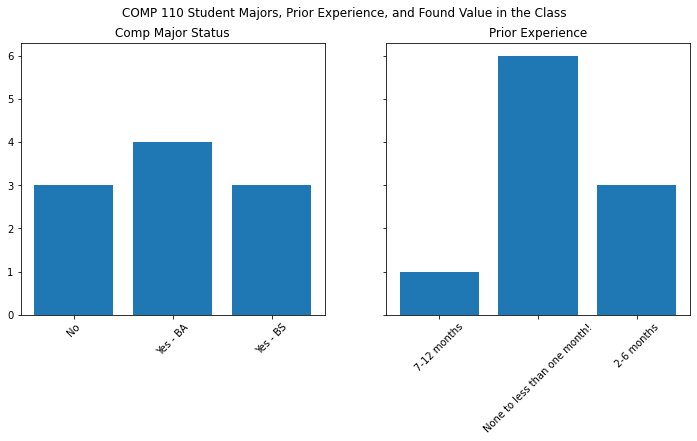

In [11]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("COMP 110 Student Majors, Prior Experience, and Found Value in the Class")


axes[0].set_title("Comp Major Status")
axes[0].bar(comp_major_counts.keys(), comp_major_counts.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Prior Experience")
axes[1].bar(prior_exp_counts.keys(), prior_exp_counts.values())
axes[1].tick_params(axis='x', labelrotation = 45)

axes[2].set_title("Value Rating")
axes[2].bar(valuable_counts.keys(), valuable_counts.values())
axes[2].tick_params(axis='x', labelrotation = 45)

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion



According to these data, many students in COMP 110 are computer science majors, many students are new to programming, and many students rate the class a 7 on a scale of 1-7 for value, with 1 being the lowest possible score and 7 being the highest. As such, one can assume that many students in the class would be interested in getting involved with computer science opportunities through COMP 110. However, it should also be noted that this analysis includes only a small sample population, and may not reflect the overall class data perfectly.

This idea could be carried out by creating a listserv group for students to sign up for at the beginning of the semester, and presumably keep up with during future semesters.

However, potential drawbacks of this idea include students signing up for the Listserv and receiving more emails than they will want to read, or sending emails to any students who lose interest in computer science over time, but who remain on the Listserv.

To avoid these drawbacks, a survey could be sent out each semester asking students if they wish to remain on the listserv or not, and if they would like to recommend it to friends who are not currently on the list. Drawbacks could also be avoided by asking students how many emails from the group they would want to read each week.